In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import bs4
import textblob
# roberta - wytrenowany model z hugging face
# vader - bag of words 

In [214]:
df_br = pd.read_csv("blade-runner-2049_fixed.csv")
df_d = pd.read_csv("drive-2011_fixed.csv")
df_fc = pd.read_csv("fight-club_fixed.csv")
df_ap = pd.read_csv("american-psycho_fixed.csv")
dfs = [df_br, df_d, df_fc, df_ap]

In [215]:
print("przed usunięciem wierszy bez ocen lub daty:", [d.shape[0] for d in dfs], '\nrazem:', sum([d.shape[0] for d in dfs]))

przed usunięciem wierszy bez ocen lub daty: [9296, 9558, 9048, 9279] 
razem: 37181


### Badanie czy wydźwięk recenzji zgadza się z opinią

In [216]:
for i in range(len(dfs)):
    # Drop rows with missing 'Rating' values
    dfs[i] = dfs[i].dropna(subset=['Rating']).copy()
    # Convert 'Rating' column to integer
    dfs[i]['Rating'] = dfs[i]['Rating'].astype(int)
    # Drop rows with missing date values, assuming the column name for date is 'Date'
    dfs[i] = dfs[i].dropna(subset=['Date']).copy()
    # Filter out rows where 'Date' is earlier than '2011-01-01'
    dfs[i] = dfs[i][dfs[i]['Date'] >= '2011-01-01']


In [220]:

df = pd.concat(dfs)
df.to_csv("all_reviews.csv", index=False)
print("po usunięciu", [d.shape[0] for d in dfs], '\nrazem:', df.shape[0])

po usunięciu [8569, 8027, 7649, 8235] 
razem: 32480


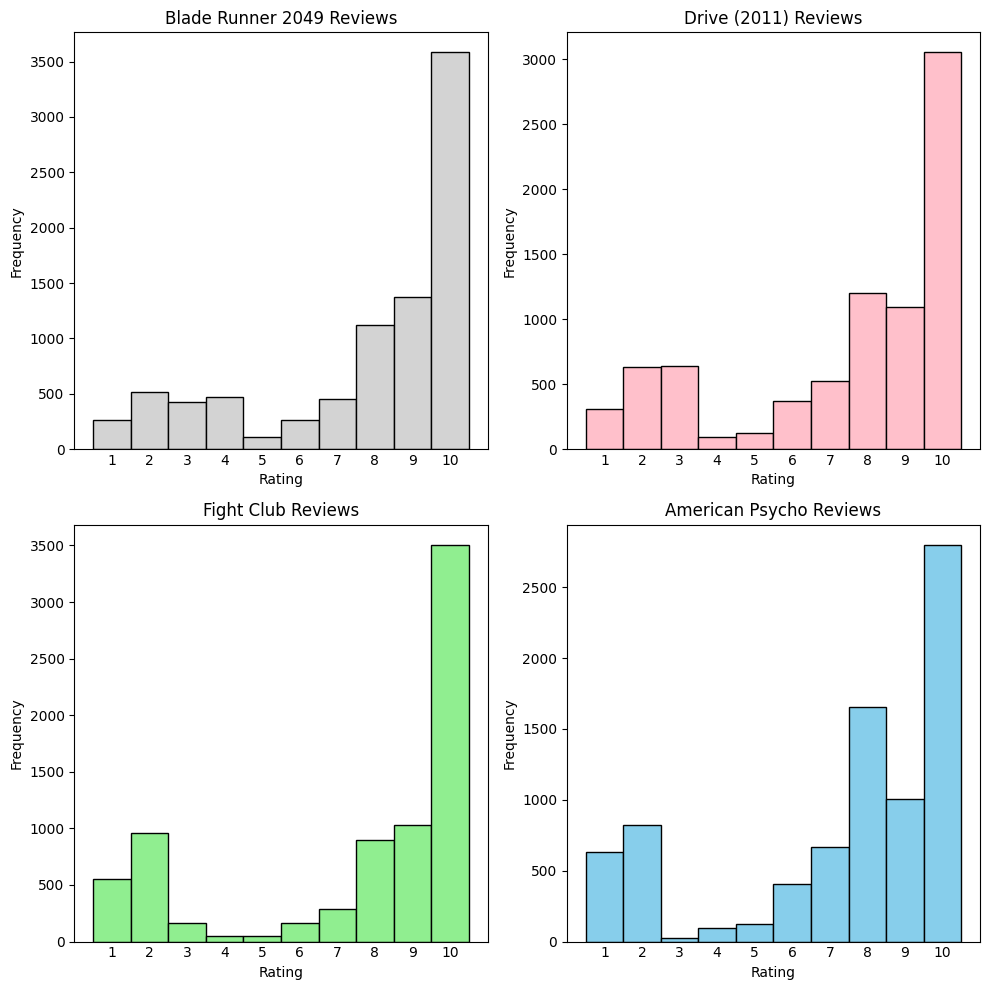

In [221]:
plt.figure(figsize=(10, 10))

x_ticks = list(range(1, 11))

plt.subplot(2, 2, 1)
plt.hist(dfs[0]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='lightgray')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Blade Runner 2049 Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(dfs[1]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='pink')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Drive (2011) Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(dfs[2]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='lightgreen')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Fight Club Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(dfs[3]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='skyblue')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('American Psycho Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

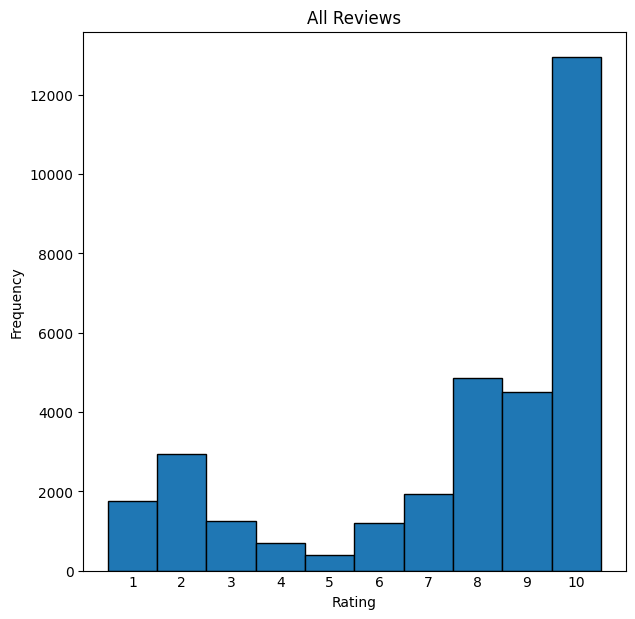

In [222]:
plt.figure(figsize=(7, 7))

x_ticks = list(range(1, 11))

plt.hist(df['Rating'], bins=range(1, 12), edgecolor='black', align='left')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('All Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC') ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']


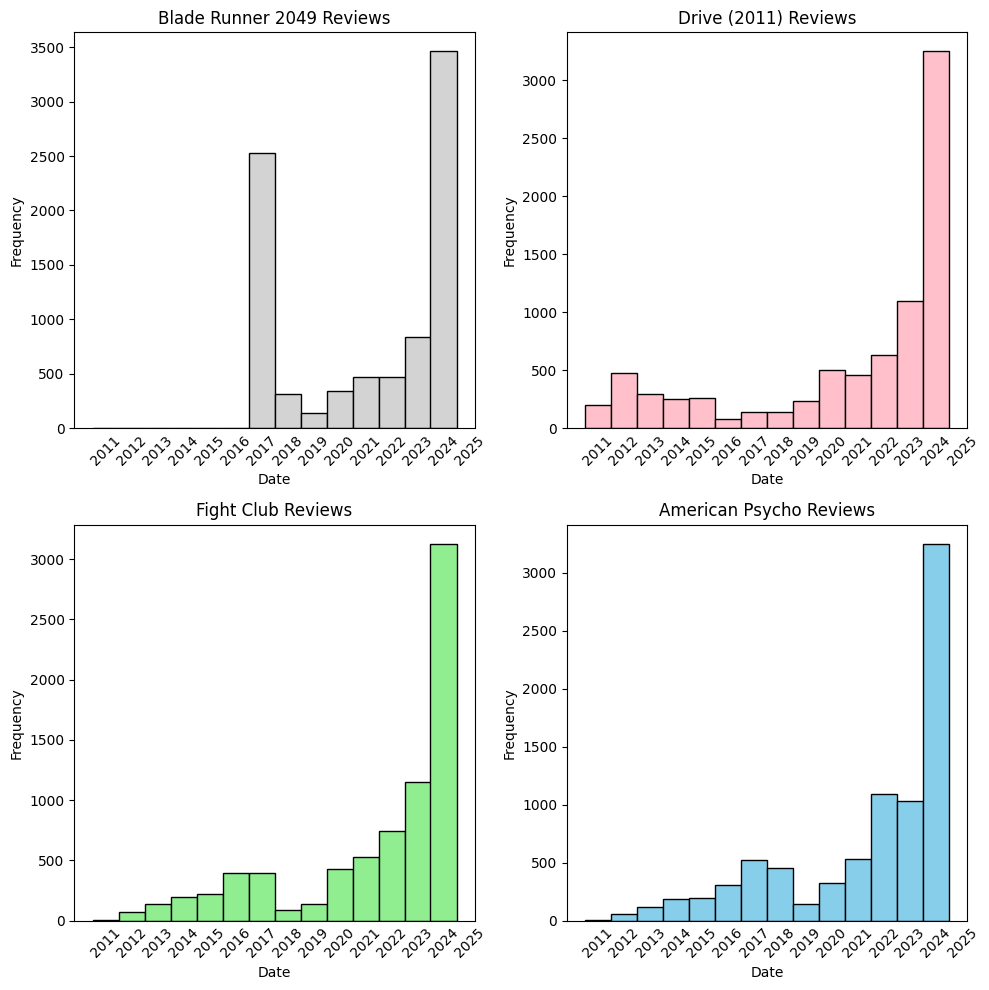

In [223]:
for i in range(len(dfs)):
    dfs[i]['Date'] = pd.to_datetime(dfs[i]['Date'])

# Define the date range and bins for the histogram
date_bins = pd.date_range(start='2010-01-01', end='2025-01-01', freq='Y')
date_labels = [str(year) for year in range(2011, 2026)]
print(date_bins, date_labels)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.hist(dfs[0]['Date'], bins=date_bins, edgecolor='black', color='lightgray', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Blade Runner 2049 Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(dfs[1]['Date'], bins=date_bins, edgecolor='black', color='pink', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Drive (2011) Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(dfs[2]['Date'], bins=date_bins, edgecolor='black', color='lightgreen', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Fight Club Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(dfs[3]['Date'], bins=date_bins, edgecolor='black', color='skyblue', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('American Psycho Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC') ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']


<Figure size 800x800 with 0 Axes>

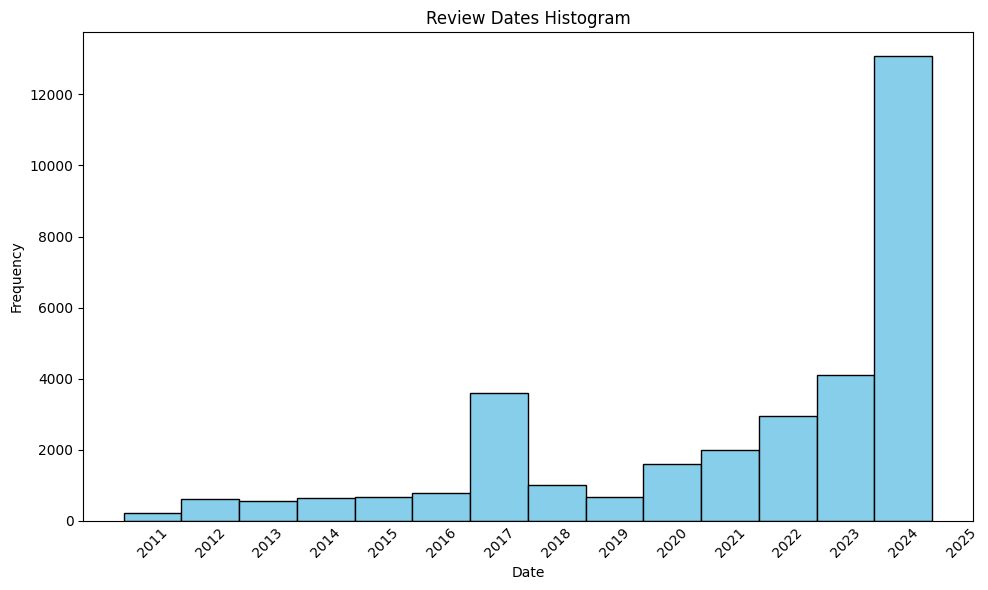

In [224]:
plt.close()
plt.figure(figsize=(8, 8))

df['Date'] = pd.to_datetime(df['Date'])

# Define the date range and bins for the histogram
date_bins = pd.date_range(start='2010-01-01', end='2025-01-01', freq='Y')
date_labels = [str(year) for year in range(2011, 2026)]
print(date_bins, date_labels)

plt.figure(figsize=(10, 6))

plt.hist(df['Date'], bins=date_bins, edgecolor='black', color='skyblue', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Review Dates Histogram')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [133]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [225]:
df = pd.read_csv("all_reviews.csv")

In [226]:
df = df.reset_index().rename(columns={'index': 'Id'})

In [227]:
vader_a = SentimentIntensityAnalyzer()

In [228]:
res = {}
for i, row in tqdm(df.iterrows()):
    review = row['Review']
    rev_id = row['Id']
    res[rev_id] = vader_a.polarity_scores(review)

0it [00:00, ?it/s]

In [229]:
vaders = pd.DataFrame(res).T

In [230]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [231]:
vaders

,Id,neg,neu,pos,compound,Date,Review,Rating
0,0,0.000,0.760,0.240,0.9118,2024-06-13,A well shot film with great acting that falls ...,8
1,1,0.000,1.000,0.000,0.0000,2024-06-13,THIS IS CINEMA!!! 👑🗣,10
2,2,0.000,1.000,0.000,0.0000,2024-06-13,why are the barcodes in the eye. WHY.,6
3,3,0.000,0.650,0.350,0.8658,2022-12-17,"It's a great film, definitely a worthy follow-...",9
4,4,0.000,0.530,0.470,0.7964,2024-06-13,it’s a good movie i love ryan gosling and ana ...,6
...,...,...,...,...,...,...,...,...
32475,32475,0.000,1.000,0.000,0.0000,2022-04-29,i saw a 60 second clip of this movie on my fyp...,2
32476,32476,0.512,0.488,0.000,-0.2732,2022-04-29,"I got bored, quickly.",2
32477,32477,0.000,0.673,0.327,0.5984,2022-04-27,Overated as balls got more enjoyment from ball...,2
32478,32478,0.115,0.705,0.180,0.5719,2022-04-26,There was a lot of unnecessary things that too...,2


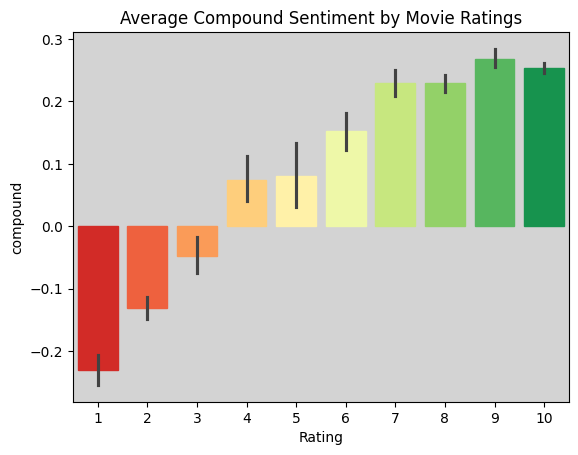

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Przygotowanie danych i wykresu
ax = sns.barplot(data=vaders, x='Rating', y='compound')

# Ustawienie tytułu wykresu
ax.set_title("Average Compound Sentiment by Movie Ratings")

# Generowanie palety kolorów (gradient od czerwonego do zielonego)
colors = sns.color_palette("RdYlGn", len(vaders['Rating'].unique()))

# Ustawienie kolorów słupków
for i, bar in enumerate(ax.patches):
    rating_index = i % len(vaders['Rating'].unique())
    bar.set_color(colors[rating_index])

# Wyświetlenie wykresu
ax.set_facecolor('lightgray')
plt.show()


## Roberta

In [235]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [236]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/home/agata/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification m

In [237]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [238]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    encoded_text.to(device)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [239]:
example = df.iloc[1]['Review']
df.iloc[1]['Rating'], df.iloc[1]['Review']

(10, 'THIS IS CINEMA!!! 👑🗣')

In [240]:
vader_a.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [241]:
polarity_scores_roberta(example)

{'roberta_neg': 0.0089774905,
 'roberta_neu': 0.10033583,
 'roberta_pos': 0.89068663}

In [152]:
res = {}
for i, row in tqdm(df.iterrows()):
    try:
        review = row['Review']
        rev_id = row['Id']
        vader_res = vader_a.polarity_scores(review)
        vader_res_rename = {}
        for key, value in vader_res.items():
            vader_res_rename[f"vader_{key}"] = value
        roberta_res = polarity_scores_roberta(review)
        both = {**vader_res_rename, **roberta_res}
        res[rev_id] = both
    except RuntimeError:
        print(f'Broke for id {rev_id}')


0it [00:00, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [234]:
results_df.shape[0]

32480

In [155]:
results_df.to_csv("results.csv", index=False)

In [248]:
res3 = pd.read_csv("results1.csv")
res3 = res3[res3['Date'] >= '2011-01-01']
res3.shape[0]

32480

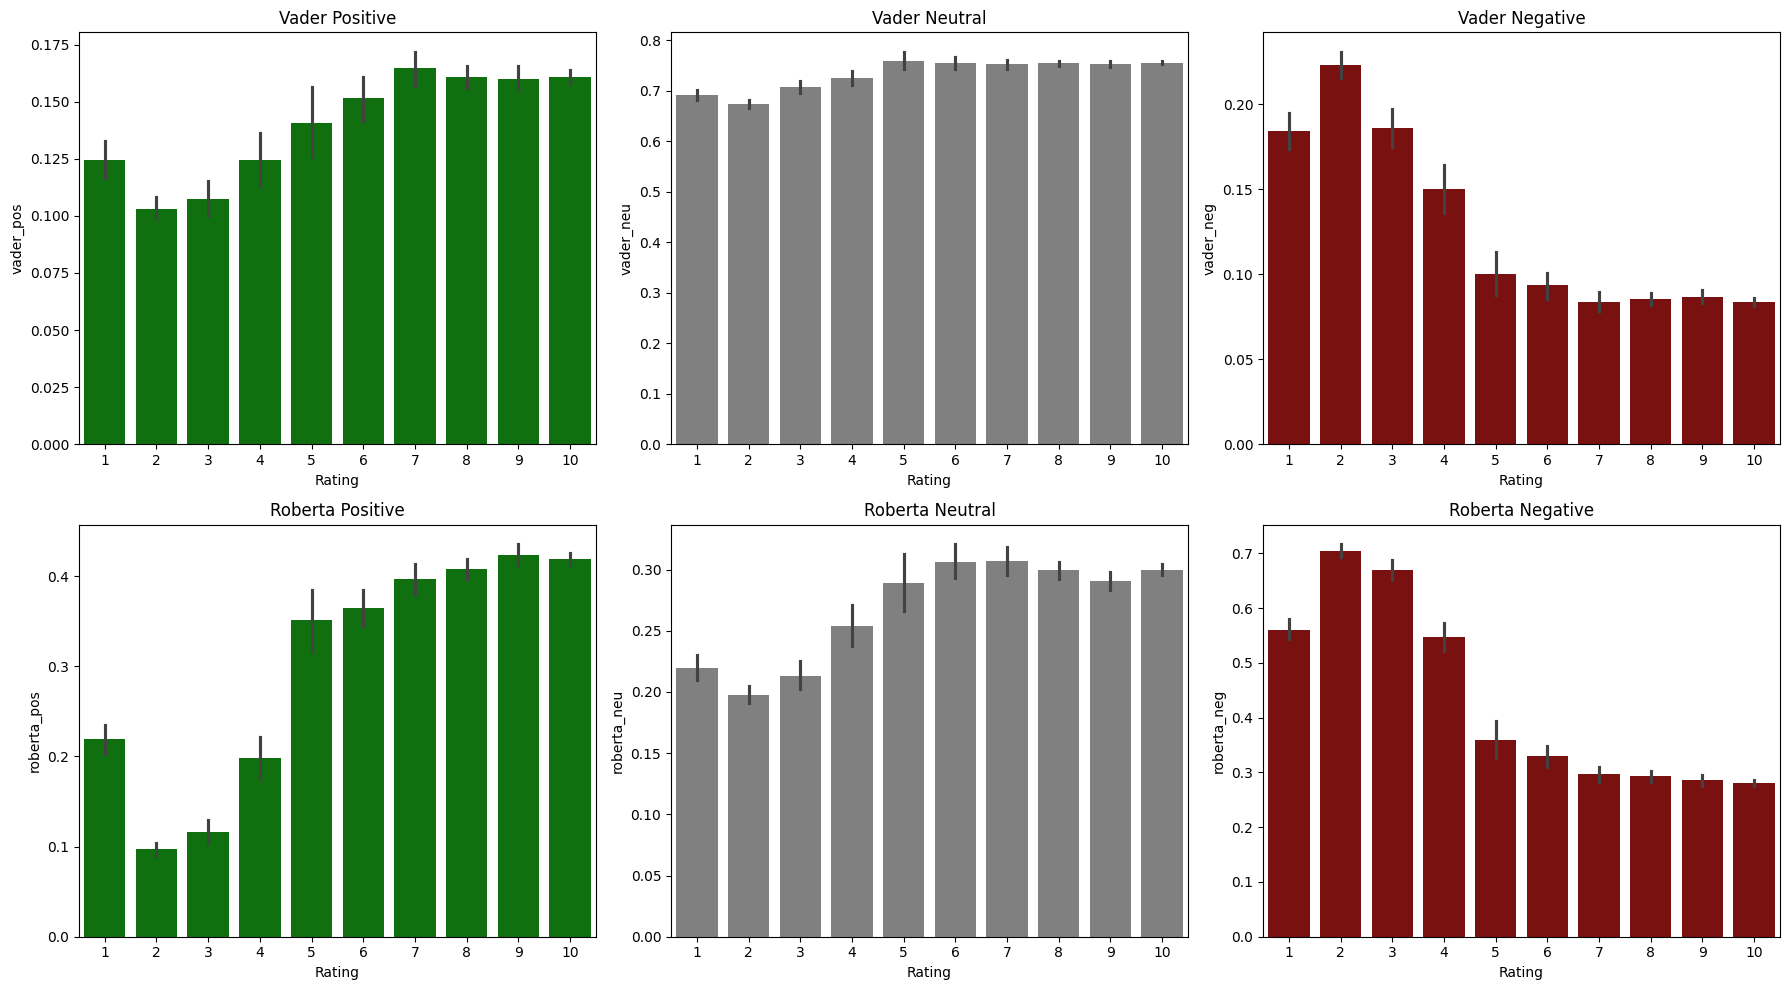

In [249]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plotting Vader Positive
sns.barplot(data=res3, x='Rating', y='vader_pos', ax=axs[0, 0], color='green')
axs[0, 0].set_title('Vader Positive')
# axs[0, 0].set_ylim(0, 0.45)

# Plotting Vader Neutral
sns.barplot(data=res3, x='Rating', y='vader_neu', ax=axs[0, 1], color='gray')
axs[0, 1].set_title('Vader Neutral')
# axs[0, 1].set_ylim(0, 0.8)

# Plotting Vader Negative
sns.barplot(data=res3, x='Rating', y='vader_neg', ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Vader Negative')
# axs[0, 2].set_ylim(0, 0.75)

# Plotting Roberta Positive
sns.barplot(data=res3, x='Rating', y='roberta_pos', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Roberta Positive')
# axs[1, 0].set_ylim(0, 0.45)

# Plotting Roberta Neutral
sns.barplot(data=res3, x='Rating', y='roberta_neu', ax=axs[1, 1], color='gray')
axs[1, 1].set_title('Roberta Neutral')
# axs[1, 1].set_ylim(0, 0.8)

# Plotting Roberta Negative
sns.barplot(data=res3, x='Rating', y='roberta_neg', ax=axs[1, 2], color='darkred')
axs[1, 2].set_title('Roberta Negative')
# axs[1, 2].set_ylim(0, 0.75)

plt.tight_layout()
plt.show()

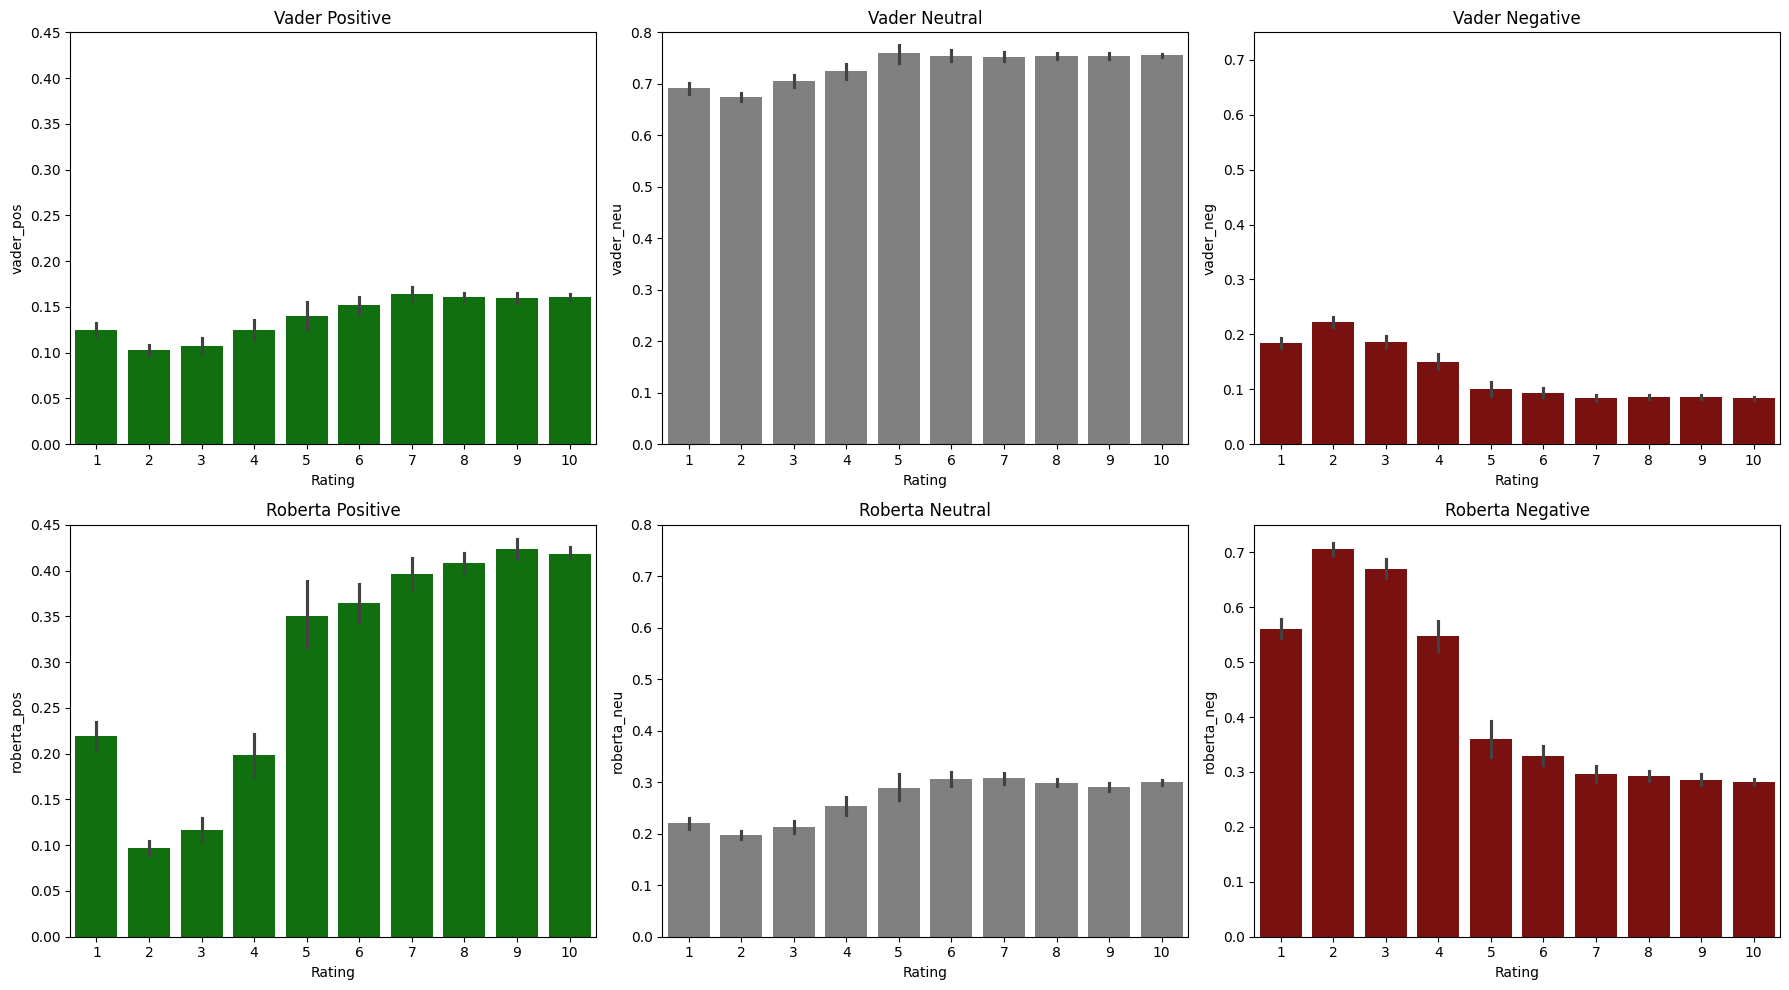

In [250]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plotting Vader Positive
sns.barplot(data=res3, x='Rating', y='vader_pos', ax=axs[0, 0], color='green')
axs[0, 0].set_title('Vader Positive')
axs[0, 0].set_ylim(0, 0.45)

# Plotting Vader Neutral
sns.barplot(data=res3, x='Rating', y='vader_neu', ax=axs[0, 1], color='gray')
axs[0, 1].set_title('Vader Neutral')
axs[0, 1].set_ylim(0, 0.8)

# Plotting Vader Negative
sns.barplot(data=res3, x='Rating', y='vader_neg', ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Vader Negative')
axs[0, 2].set_ylim(0, 0.75)

# Plotting Roberta Positive
sns.barplot(data=res3, x='Rating', y='roberta_pos', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Roberta Positive')
axs[1, 0].set_ylim(0, 0.45)

# Plotting Roberta Neutral
sns.barplot(data=res3, x='Rating', y='roberta_neu', ax=axs[1, 1], color='gray')
axs[1, 1].set_title('Roberta Neutral')
axs[1, 1].set_ylim(0, 0.8)

# Plotting Roberta Negative
sns.barplot(data=res3, x='Rating', y='roberta_neg', ax=axs[1, 2], color='darkred')
axs[1, 2].set_title('Roberta Negative')
axs[1, 2].set_ylim(0, 0.75)

plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue='Rating', palette="RdYlGn")
plt.show()

Do dalszych badań wykorzystano model Roberta

In [251]:
# najbardziej pozytywne recenzje z rating 1
res3.query("Rating == 1").sort_values('vader_pos', ascending=False)['Review'].values[0:50]

array(['Predictable',
       'there’s nothing i hate more than men causing chaos. gross.',
       'This movie sucks. It’s boring, it’s too quiet and it’s hard to understand why things are happening. Gets half a star because it can’t get 0',
       'please lord never let me sit through this movie again',
       'sooo overrated. just a movie about dudes wanting to hangout but afraid of sounding gay',
       'NoI felt bad and\xa0traumatized and sad after watching this',
       'This shit boring as hell', "No Patrick Bateman, that's for sure!",
       'nicolas winding refn: i love uhhhhhhh misogynykino bros on letterboxd: wow... every shot a painting... a masterpiece...',
       'Hugh grant is not in this film',
       'I will adhere to the first rule of fight club and never talk about it again. 👎',
       'who cares',
       "I'm happy for the people that like this film, but I will never understand them. This is an unpopular opinion, but this is one of the worst movies I have ever seen. S

In [252]:
# najbardziej pozytywne recenzje z rating 1
a = res3.query("Rating == 1").sort_values('roberta_pos', ascending=False)[['Review', 'roberta_pos']].values[0:10]
for i in a:
    print(i[1], i[0])

0.9893894791603088 The only movie I’ve tried to fall asleep during so it would be over sooner
0.9893894791603088 I HATE THIS MOVIE!!!!!!!!!!
0.989079773426056 Such a thought provoking and amazing movie 🤩🤩🤩🤩🤩🤩
0.989079773426056 Meh, well it was something
0.9884993433952332 to quote the vomiting lady from little Britain 
0.9884993433952332 can someone please tell me why they had a character employing child labor named Mr. Cotton that was played by a Black man? i can't believe i even have to type that out
0.9884881377220154 it was shit
0.9884881377220154 The most boring movie I’ve ever seen in my life. The pacing was incredibly SLOW. It takes K three minutes to walk ANYWHERE. There is absolutely no plot until TWO HOURS into the movie and even that is stupidly boring. The potentially beautiful visuals we’re blocked by a gigantic cloud of smog and what wasn’t covered with smog was drowned in yellow or blue. The amount of nudity in this movie was completely unnecessary and sexist it looked l

In [253]:
b = res3.query("Rating == 10").sort_values('roberta_neg', ascending=False)[['Review', 'roberta_neg', 'roberta_pos']].values[0:10]
for i in b:
    print(i[1], i[0])

0.966413140296936 I forced my sister to watch this today just to show her how good of an actor Edward Norton is because she had no clue who he was and she is now a fan
0.966413140296936 i was in the middle of an existential crisis, and now i am becoming a crisis.
0.9653991460800172 It's really rather neon isn't it? An intense glow of garish colour with a buzzing vibe. Every watch always delivers a phenomenally stylish ride!
0.9627047777175904 sigmas be like "he's literally me" and then he's an autistic coded loserish incredibly lonely depressed man
0.9624489545822144 first rule of fight club is you can’t fight unless your covered in oil
0.9623484015464784 Liposuction is expensive, but when you consider how much soap you could then make, you might actually turn a profit!
0.9614063501358032 the saddest character i’ve ever watched
0.9613170027732848 “Want a glass of water?”
0.9611655473709106 You're a fucking ugly bitch. I want to stab you to death, and then play around with your blood.
0

In [254]:
res3.sort_values('Date')

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Date,Review,Rating
7192,2120,0.149,0.724,0.127,-0.1906,0.079997,0.353745,0.566258,2011-01-10,Christian Bales greatest role for me. Its all ...,8
7479,2232,0.000,1.000,0.000,0.0000,0.005253,0.892478,0.102270,2011-02-19,"Watched at Rav's flat in Chester with Rav, Jon...",8
6433,1804,0.000,1.000,0.000,0.0000,0.013963,0.921327,0.064711,2011-03-10,Commentary with Guinevere Turner,7
6827,1978,0.000,0.741,0.259,0.2732,0.009836,0.026548,0.963616,2011-04-02,Decent adaptation. Translated well to the screen.,6
6342,1757,0.000,0.598,0.402,0.9294,0.006989,0.021636,0.971375,2011-04-04,Definition of Wow — used to express strong fee...,10
...,...,...,...,...,...,...,...,...,...,...,...
523,142,0.529,0.471,0.000,-0.6705,0.894918,0.094961,0.010121,2024-06-14,Tyler Durden is just a menstruating person wit...,8
46,12,0.240,0.399,0.361,0.2996,0.007506,0.175191,0.817304,2024-06-14,im questioning my whole entire life rn,10
394,106,0.232,0.564,0.204,-0.1010,0.773150,0.174227,0.052623,2024-06-14,i watched this at 3am. I think i was too tired...,7
238,64,0.000,0.775,0.225,0.4404,0.024445,0.308084,0.667470,2024-06-14,i watched it only for Christian bale and that’...,8


/tmp/ipykernel_3805/627863403.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_means = results_df.groupby('Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]


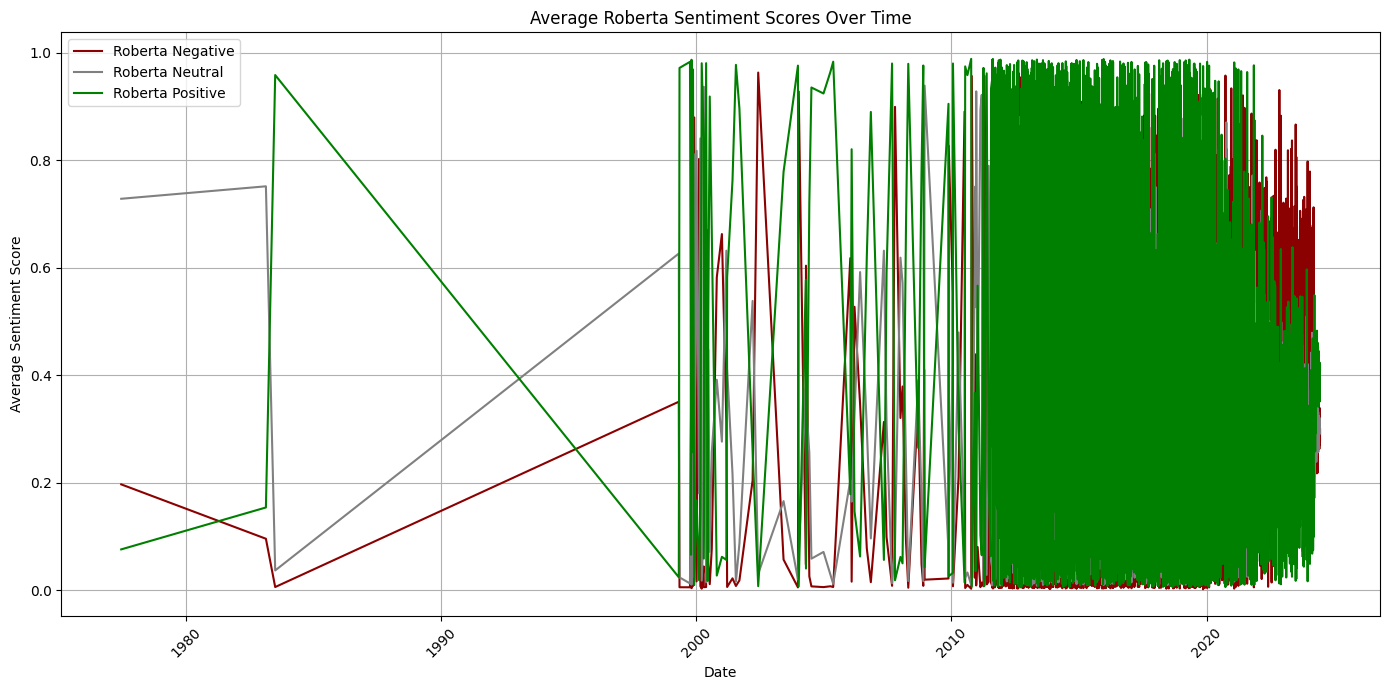

In [203]:
res3['Date'] = pd.to_datetime(res3['Date'])

# Group by 'Date' and calculate the mean of the sentiment scores
daily_means = res3.groupby('Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]

# Plotting the sentiment scores over time
plt.figure(figsize=(14, 7))

plt.plot(daily_means.index, daily_means['roberta_neg'], label='Roberta Negative', color='darkred')
plt.plot(daily_means.index, daily_means['roberta_neu'], label='Roberta Neutral', color='gray')
plt.plot(daily_means.index, daily_means['roberta_pos'], label='Roberta Positive', color='green')

plt.title('Average Roberta Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()